# Virtual Pruning

## Importing the digitized structure

In [1]:
import numpy as np

from importlib import reload

import mangoG3; reload(mangoG3)
from mangoG3 import *

g = get_G3_mtg()

In [2]:
from matplotlib.pyplot import *
import mtgplot as mp
reload(mp)

<module 'mtgplot' from '/Users/fboudon/Develop/oagit/virtualpruning/notebooks/mtgplot.py'>

## Pruning procedure

To select a pruning point, we start from terminal points, trace back into the structure up to 3 layers. We check if the pruning point is valid by looking the depth of what it carries. If it is in average close to what is intended we select it. Else we select another one.

Point d'amélioration : tailler en fait au milieu de la n4.

In [3]:
import pruning ; reload(pruning)
from pruning import *

## Estimation of gap fraction 

In [12]:
import gapfraction; reload(gapfraction)
from gapfraction import *

0.1299800202185836


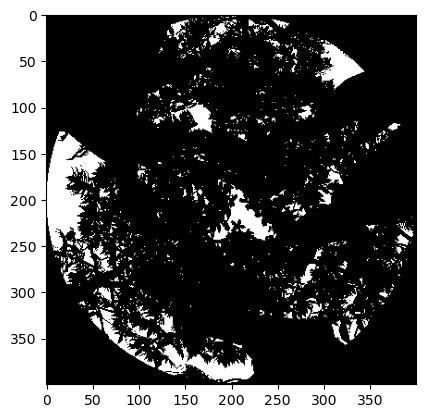

In [40]:
img = hemispherical_view(g, debug=True)
print(gap_fraction_from_image(img))
imshow(img)

In [8]:
import pruning ; reload(pruning)
from pruning import *

t3s = prune(g, 180, summitratio = 0.8, summitalradius=100)
#t3s = prune(g, 180)

intensity = continuous_intensity_from_pruned(t3s)
print(intensity, intensity_level(intensity))


0.555163871745234 T3


In [9]:
check_summital_ratio(t3s)

0.4148148148148148

In [10]:
plot_pruning(t3s, leaves =True, checkvalidity=False)

SceneWidget(scenes=[{'id': 'ewXbF3F5hCx33xIdS5f6zpOud', 'data': b'x\xda\xac\x9d\x07t\x13G\x13\xc7\x8d\xe9\xa6\…

0.2748055752346231


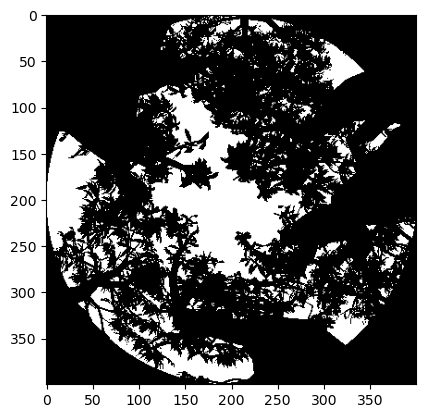

In [13]:
img = hemispherical_view(t3s, debug=True)
print(gap_fraction_from_image(img))
imshow(img)

In [14]:
result = []
actualr = []
for r in range(1,51,3):
    t3s = prune(g, 180, summitratio = r/100, summitalradius=100)
    actualr.append(check_summital_ratio(t3s))
    result.append(gap_fraction(t3s))


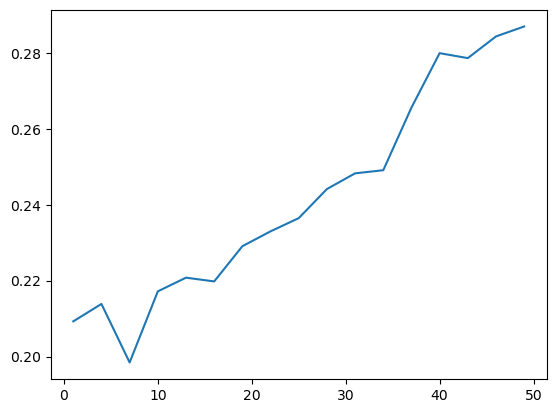

In [15]:
plot(range(1,51,3),result)
show()

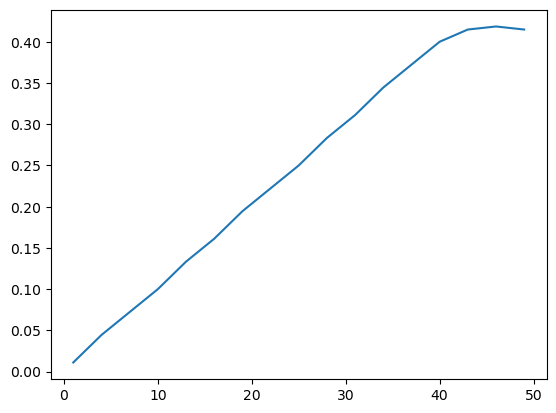

In [16]:
plot(range(1,51,3),actualr)
show()

In [36]:
import mortality ; reload(mortality)
from mortality import gu_mortalities_post_pruning

t3, removed = gu_mortalities_post_pruning(t3s, intensity = intensity)

Should examine 2489  GUs.


In [43]:
print(len(removed))

270


0.2135448589873196


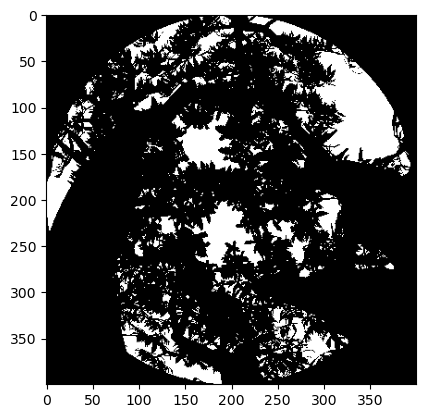

In [37]:
sc = mp.representation(t3, colorizer=mp.BlackColoring, leaves=True, wood = True, gc=True, leafreorientation=30)
img = hemispherical_view_from_scene(sc)
print(gap_fraction_from_image(img))
imshow(img)

In [41]:
from openalea.plantgl.all import *
sc = mp.representation(t3,  leaves=True, wood = True, gc=True, leafreorientation=30)
sc += Scene([Shape(Translated(optimal,Sphere(10)),Material((255,0,0)))])
mp.display(sc)

SceneWidget(scenes=[{'id': 'aVtg3MWrNFTVyXj0NxkSZzlVJ', 'data': b'x\xda\xcc\xbd\x07|\x13\xc7\xd6\xf7o:\x98b\xc…

In [19]:
result = []
for a in range(0,90,5):
    sc = mp.representation(t3, colorizer=mp.BlackColoring, leaves=True, wood = True, gc=True, leafreorientation=a)    
    img = hemispherical_view_from_scene(sc)
    r = gap_fraction_from_image(img)
    result.append((a,r))
    # imshow(img)

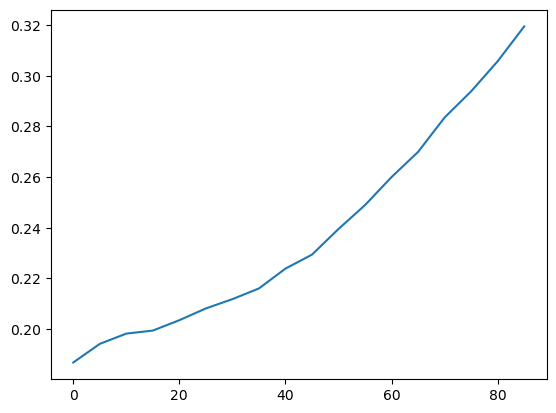

In [20]:
plot([a for a,r in result],[r for a,r in result])
show()

# Sensitivity analysis for best position of camera for gap fraction

In [46]:
from random import uniform
xpos0 = 0 # 25
ypos0 = 30
zpos0 = 120
gfs = []
positions = []
sc = generate_representation(t3, colorizer=mp.BlackColoring, leaves=True, gc=True)
xrange = 25
yrange = 10
zrange = 10
nbTests = 50
for i in range(nbTests):
    xpos = xpos0 + uniform(-xrange,xrange)
    ypos = ypos0 + uniform(-yrange,yrange)
    zpos = zpos0 + uniform(-zrange,zrange)
    lgf = gap_fraction_from_scene(sc,camposition=(xpos, ypos, zpos))
    positions.append((xpos,ypos,zpos))
    gfs.append(lgf)
print('Max gap fraction :', max(gfs))

Max gap fraction : 0.22041440136276438


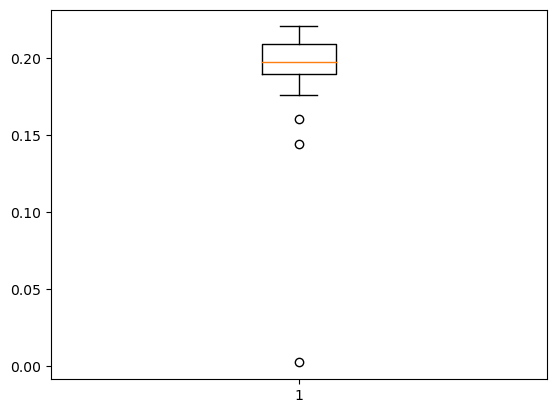

In [47]:
boxplot(gfs)
show()

(0.22041440136276438, (-19.303804768375148, 21.331627638540954, 112.39776326850051))


<Figure size 2000x10000 with 0 Axes>

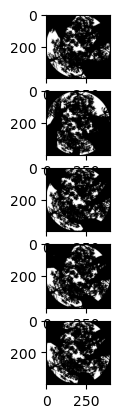

In [48]:
listpos = list(sorted(list(zip(gfs,positions)),reverse=True))
#a = gfs.index(max(gfs))
print(listpos[0])
nb = 5
figure(figsize=(20,20*nb))
f, axarr = subplots(nb,1) 
for i in range(nb):        
    img = hemispherical_view_from_scene(sc, camposition = listpos[i][1])
    axarr[i].imshow(img)
show()

In [49]:
from openalea.plantgl.all import *
scd = Scene(sc)
cmap = PglMaterialMap(min(gfs),max(gfs))
scd += Scene([Shape(Translated(listpos[i][1],Sphere(5)),cmap(listpos[i][0])) for i in range(nbTests)])
scd += Scene([Shape(Translated(listpos[i][1],Sphere(5)),cmap(listpos[i][0])) for i in range(nbTests)])
mp.display(scd)

SceneWidget(scenes=[{'id': 'fTODq32PvdfD03EmUynLgx8Xy', 'data': b'x\xda\xcc\xbd\x07x\x13\xc7\x16\xf7m\x1bL1\x1…

In [40]:
optimal = (-12, 22, 122) # 0.23

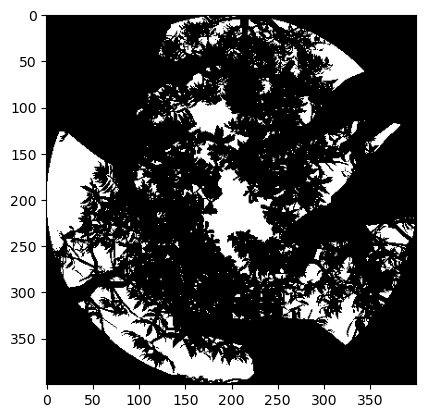

28965 125627
0.23056349351652114


In [24]:
print(gap_fraction(t3, size = 400, camposition = optimal, debug=True))

In [50]:
def info(mtg):
    try:
        return (continuous_intensity_from_pruned(mtg), gap_fraction(mtg))
    except:
        return (continuous_intensity_from_pruned(mtg), None)
        
nbcuts = list(range(1,201, 2))
gfs = [info(prune(g,nc)) for nc in nbcuts]

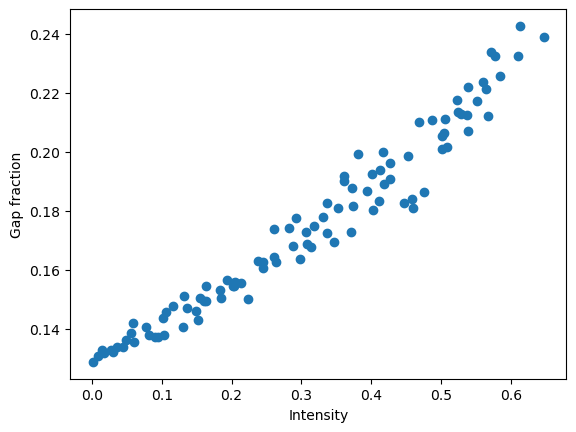

In [51]:
#ylim(0,1)
scatter([a[0] for a in gfs],[a[1] for a in gfs])
xlabel('Intensity')
ylabel('Gap fraction')
show()

In [52]:
import csv
import pandas as pd 

df = pd.DataFrame(gfs) 

df.to_csv('regression_GAP_T.csv') 

In [53]:
df = ([a*3 for a in nbcuts],[a[0] for a in gfs])

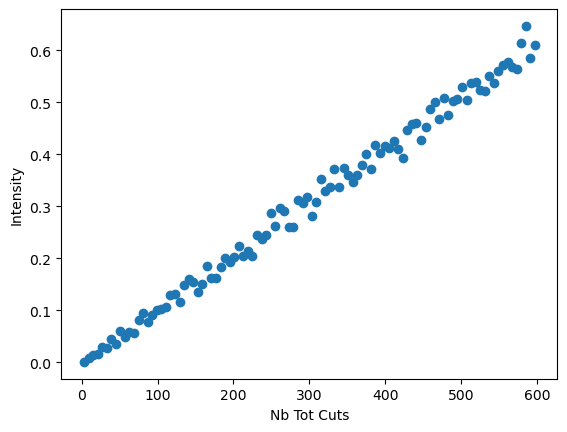

In [54]:
scatter([a*3 for a in nbcuts],[a[0] for a in gfs])
xlabel('Nb Tot Cuts')
ylabel('Intensity')
show()

In [55]:
import csv
import pandas as pd 

df = pd.DataFrame(df) 

df.to_csv('regression_T_nbcut.csv') 

# Comparison between plantgl and povray

In [56]:
img1 = pov_hemispherical_view_from_scene(sc)
img2 = pgl_hemispherical_view_from_scene(sc)

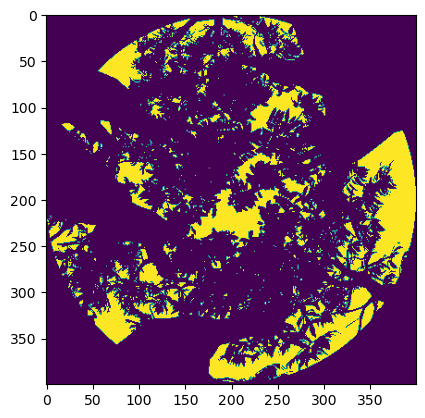

In [57]:
img1a = img1[:,:,0].astype(int)
imshow(img1a)

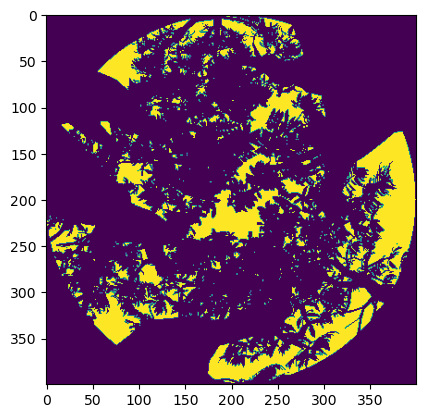

In [58]:
img2a = np.flip(img2[:,:,0],1).astype(int)
imshow(img2a)


int64
[-255    0  255]


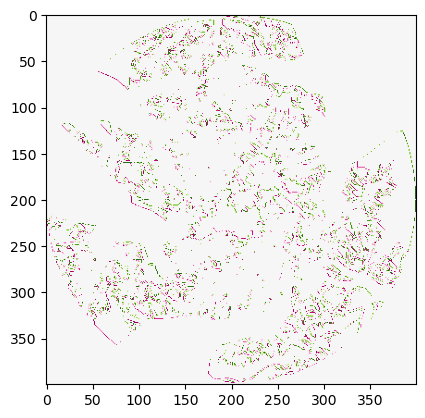

In [59]:
print(img1a.dtype)
print(np.unique(img1a-img2a))
imshow(img1a-img2a, cmap='PiYG')
show()